# building basic function with numpy

numpy를 사용해서 sigmoid function을 만들어보자.

sigmoid 함수는 $simgoid(x) = \frac{1}{1+e^{-x}}$ 이다.



In [1]:
import math

def basic_sigmoid(x):
    '''
    arguments:
    x -- scalar
    '''
    
    s = 1 / (1+math.exp(-x))
    
    return s

In [2]:
basic_sigmoid(0)

0.5

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = np.linspace(-50, 50, 100)

In [5]:
values = []

for element in x:
    value = basic_sigmoid(element)
    values.append(value)

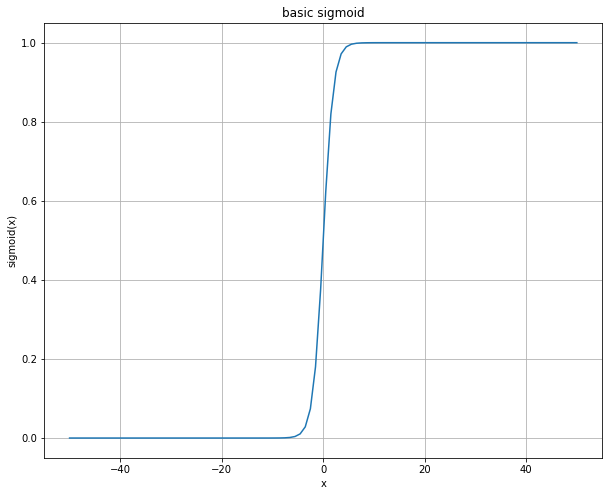

In [6]:
plt.figure(figsize=(10,8))

plt.title('basic sigmoid')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.plot(x, values)
plt.grid(True)

위에서 math 라이브러리의 exp함수를 이용하여 sigmoid function을 구현했다.

하지만 딥러닝에서는 주로 행렬과 벡터 계산을 주로 하기때문에 numpy를 사용하여 구현한다.

아래 예시를 보면 이유를 알 수 있다.

In [7]:
x = [1,2,3]

basic_sigmoid(x)

TypeError: bad operand type for unary -: 'list'

numpy 를 사용한 sigmoid 함수를 생성해보자. 

numpy의 exp함수를 사용한다.

In [8]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [9]:
x = np.linspace(-50,50,100)

sigmoid(x)

array([1.92874985e-22, 5.29611247e-22, 1.45424806e-21, 3.99318829e-21,
       1.09648093e-20, 3.01080327e-20, 8.26729955e-20, 2.27009990e-19,
       6.23341819e-19, 1.71162081e-18, 4.69990255e-18, 1.29053607e-17,
       3.54365508e-17, 9.73044580e-17, 2.67186206e-16, 7.33660821e-16,
       2.01454337e-15, 5.53169106e-15, 1.51893508e-14, 4.17081097e-14,
       1.14525396e-13, 3.14472807e-13, 8.63504075e-13, 2.37107716e-12,
       6.51068946e-12, 1.78775613e-11, 4.90896088e-11, 1.34794095e-10,
       3.70128188e-10, 1.01632698e-09, 2.79071026e-09, 7.66295088e-09,
       2.10415307e-08, 5.77774819e-08, 1.58649921e-07, 4.35633265e-07,
       1.19619505e-06, 3.28459924e-06, 9.01905826e-06, 2.47648470e-05,
       6.79983174e-05, 1.86692945e-04, 5.12469082e-04, 1.40591988e-03,
       3.85103236e-03, 1.05038445e-02, 2.83228820e-02, 7.41067363e-02,
       1.80176593e-01, 3.76354517e-01, 6.23645483e-01, 8.19823407e-01,
       9.25893264e-01, 9.71677118e-01, 9.89496155e-01, 9.96148968e-01,
      

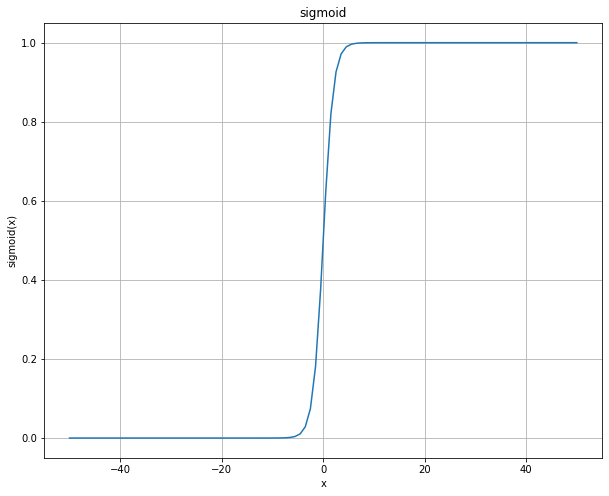

In [11]:
plt.figure(figsize=(10,8))

plt.title('sigmoid')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.plot(x, sigmoid(x))
plt.grid(True)

# sigmoid derivatives

sigmoid의 도함수는 아래와 같다.


$\frac{d}{dx}sigmoid(x) = sigmoid(x)(1-sigmoid(x))$

이를 적용하여 gradient를 얻는 함수를 생성하자.

In [12]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    
    ds = s * (1-s)
    
    return ds
    

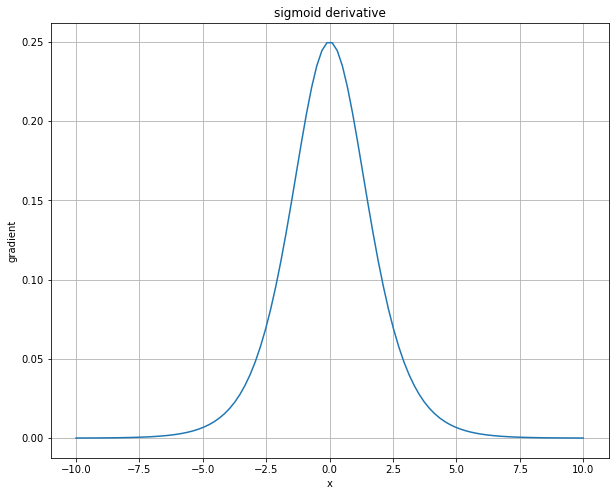

In [17]:
x = np.linspace(-10,10,100)

plt.figure(figsize=(10,8))

plt.title('sigmoid derivative')
plt.xlabel('x')
plt.ylabel('gradient')
plt.plot(x, sigmoid_derivative(x))
plt.grid(True)

# reshaping arrays

이미지를 벡터로 변환할 때 reshape를 사용할 수 있다.
이미지 3차원 -> 1차원 벡터

In [18]:
def image2vector(image):
    v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2], 1)
    return v

In [24]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])


print(f"image's shape : {image.shape}")
print("image2vector(image) = " + str(image2vector(image)))
print(f"vector shape : {image2vector(image).shape}")

image's shape : (3, 3, 2)
image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]
vector shape : (18, 1)


# Normalizing rows

머신러닝과 딥러닝에서 사용하는 또 다른 일반적인 기술은 데이터를 정규화하는 것이다. 

Gradient Descent은 정규화 후 더 빠르게 수렴하기 때문에 종종 더 나은 성능으로 이어진다. 

여기서 정규화란 x를 다음과 같이 변경하는 것을 의미한다.
 
x의 각 행 벡터를 해당 norm으로 나눈다.

$x_{normalized} = \frac{x}{||x||}$


## keepdims 예시

In [25]:
a = np.array([[1,2],
             [3,4]])

In [30]:
print(np.sum(a, axis=1, keepdims=False).shape)
print(np.sum(a, axis=1, keepdims=True).shape)

(2,)
(2, 1)


In [31]:
def normalizeRows(x):
    # np.linalg.norm 을 사용하여 x_norm 계산, keepdims 사용하여 broadcasting 가능 
    x_norm = np.linalg.norm(x,axis = 1,keepdims=True)
    
    x = x / x_norm
    
    return x

In [32]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


# softmax

softmax 함수는 아래와 같다.


$softmax_n(x) = \frac{e^{x_{n}}}{\displaystyle\sum_{k=1}^{N}{e^{x_k}}}$

이를 구현해보자.

In [33]:
def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    
    s = x_exp/x_sum
    
    return s

In [34]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


# L1 and L2 loss function

L1 loss 의 정의는 아래와 같다.

$L_1(\hat{y}, y) = {\displaystyle\sum_{i=0}^{m}}|y^{(i)} - \hat{y}^{i}|$

L2 loss 의 정의는 아래와 같다.

$L_2(\hat{y}, y) = {\displaystyle\sum_{i=0}^{m}}(y^{(i)} - \hat{y}^{i})^2$


In [36]:
def L1(yhat, y):
    
    loss = sum(abs(y-yhat))

    return loss

In [37]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))


L1 = 1.1


In [38]:
def L2(yhat, y):
    x = yhat-y
    
    loss = np.dot(x, x)
    
    return loss

In [39]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))


L2 = 0.43000000000000005
